In [11]:
from os import environ

environ['optimizer'] = 'Adam'
environ['num_workers']= '2'
environ['batch_size']= str(2048)
environ['n_epochs']= '500'
environ['batch_norm']= 'True'
environ['loss_func']='MSE'
environ['layers'] = '300 200 120 80 30'
environ['dropouts'] = '0.1 0.0 0.1 0.0 0.0'
environ['log'] = 'False'
environ['weight_decay'] = '0.01'
environ['cuda_device'] ='cuda:0'

%run utils.ipynb

In [128]:
l = l.load(f"speedup_{optimizer}_batch_norm_{batch_norm}_{loss_func}_nlayers_{len(layers_sizes)}_log_{log}")

In [6]:
l.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


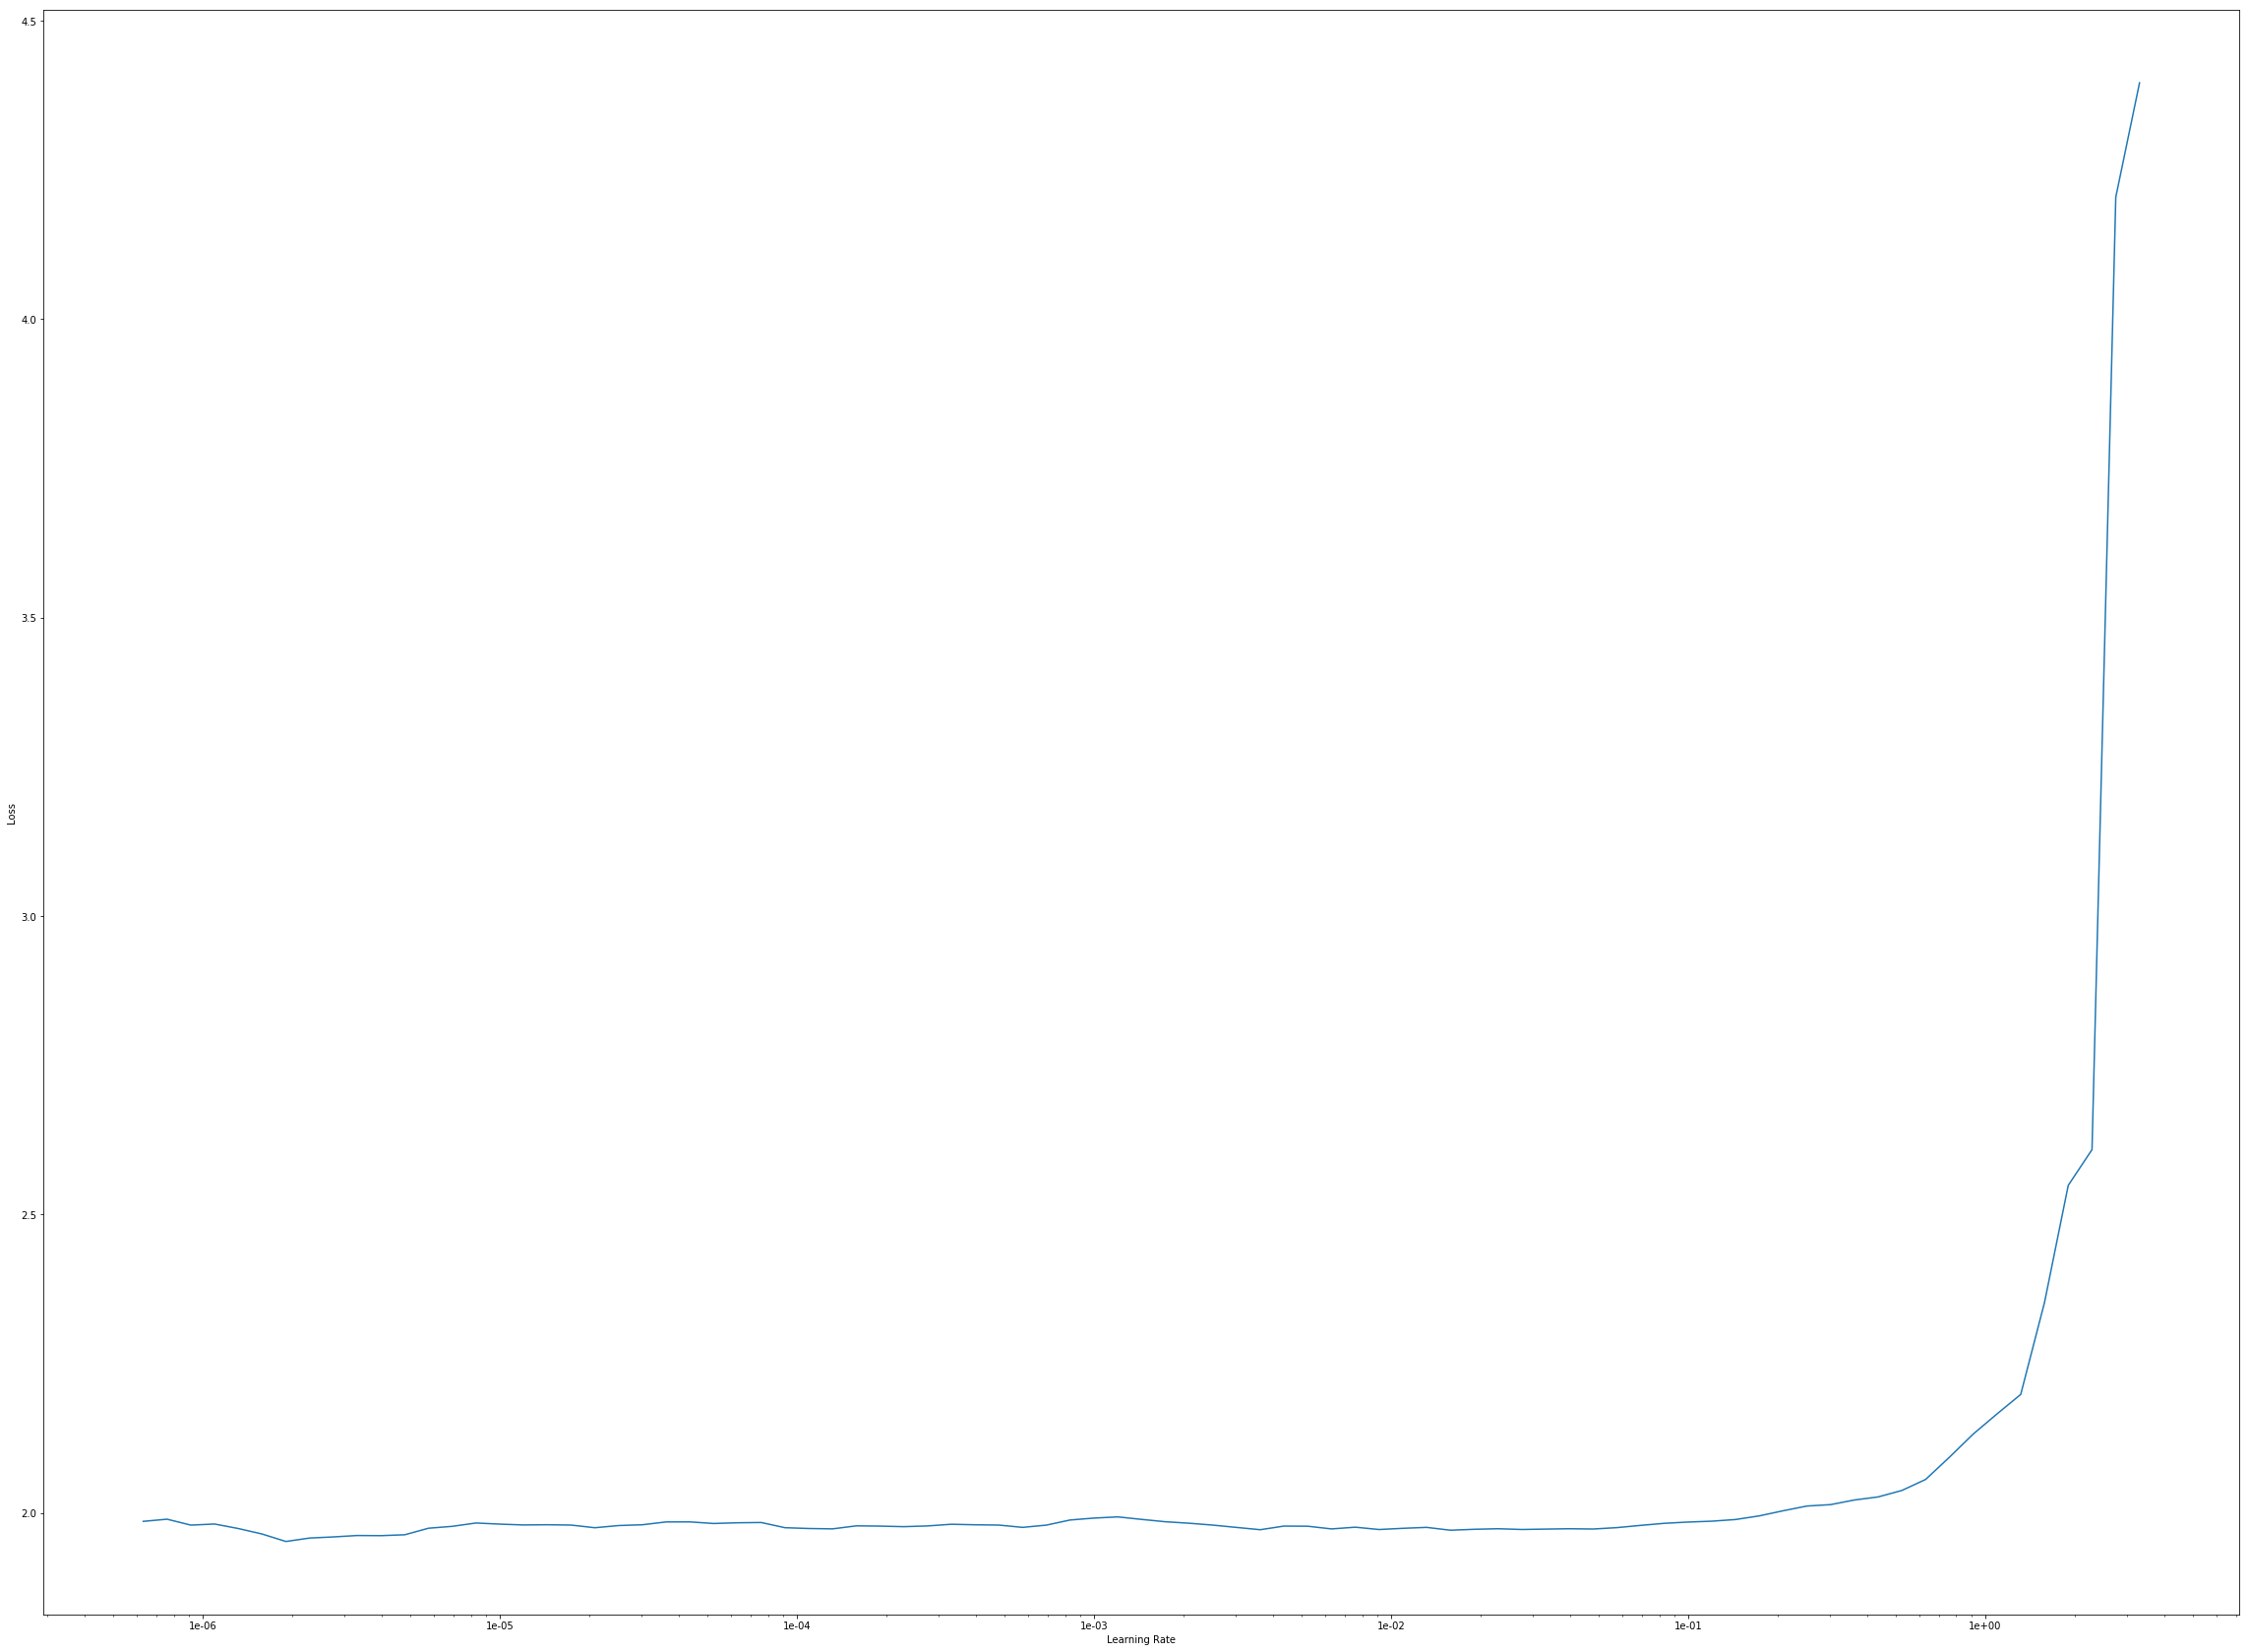

In [7]:
l.recorder.plot()

In [16]:
lr = 1e-04

In [ ]:
l.model.train()
l.fit_one_cycle(250, lr)

epoch,train_loss,valid_loss
1,1.704029,2.616331
2,1.695581,2.599916
3,1.699128,2.650707
4,1.695401,2.666148
5,1.693999,2.543989
6,1.690560,2.587368
7,1.695536,2.681418
8,1.703540,2.668646
9,1.699748,2.688944
10,1.693471,2.610209


In [ ]:
l.recorder.plot_losses()

In [14]:
l.save(f"speedup_{optimizer}_batch_norm_{batch_norm}_{loss_func}_nlayers_{len(layers_sizes)}")

In [147]:
val_df = get_results_df(val_dl, l.model)
train_df = get_results_df(train_dl, l.model)

In [152]:
df = train_df

In [153]:
df[:][['prediction','target', 'abs_diff','APE']].describe()

,prediction,target,abs_diff,APE
count,90000.000000,90000.000000,9.000000e+04,90000.000000
mean,2.136091,2.040143,4.720105e-01,55.713982
std,1.740675,1.931345,5.671608e-01,115.748390
min,0.119647,0.028617,1.788139e-07,0.000019
25%,0.888120,0.649171,1.251968e-01,8.526070
50%,1.621874,1.408142,2.812276e-01,20.892055
75%,2.851103,2.631947,5.903520e-01,45.905441
max,10.828941,13.560771,7.014128e+00,2326.283447


In [159]:
df[(df.interchange == 0) & (df.tile == 0) & (df.unroll == 1)][['prediction','target', 'abs_diff','APE']].describe()

,prediction,target,abs_diff,APE
count,5272.000000,5272.000000,5272.000000,5272.000000
mean,5.139454,5.371452,0.573196,24.085110
std,2.129367,2.290008,0.491706,81.973442
min,0.541461,0.058317,0.000058,0.001177
25%,4.618636,3.869889,0.205381,4.140809
50%,5.469416,5.639095,0.451528,8.874032
75%,6.063024,6.547940,0.809658,15.718910
max,10.828941,13.560771,3.484350,828.611633


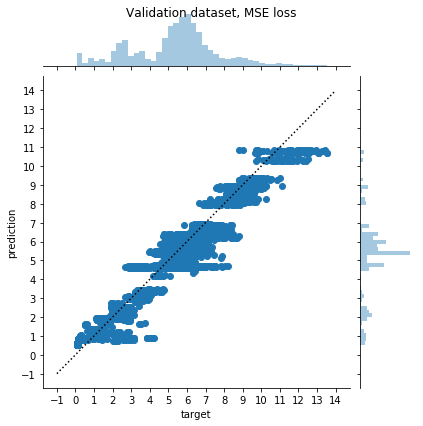

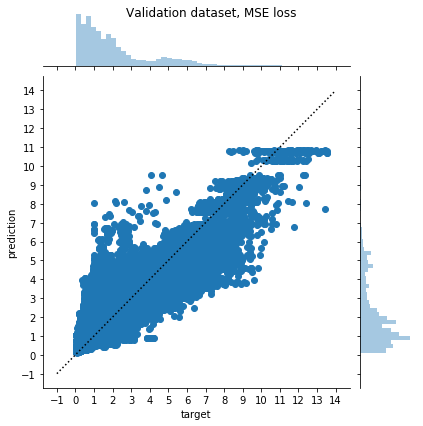

In [158]:
df1 = df[(df.interchange == 0) & (df.tile == 0) & (df.unroll == 1)]
joint_plot(df1, f"Validation dataset, {loss_func} loss")
df2 = df
joint_plot(df2, f"Validation dataset, {loss_func} loss")